In [1]:
from __future__ import absolute_import, division, print_function
import glob
import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import pdb
import json
import getpass
from scipy import stats
from sklearn import linear_model
from numpy import linalg as LA
import numpy.random as npr
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.manifold import MDS
from scipy.spatial import distance
from sklearn.cluster import KMeans

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_NET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_NET)
from tools_lnd import make_h_trial_rule, get_model_params, plot_epoch_dynamics_3D
from tools_lnd import gen_trials_from_model_dir, make_FP_axs, take_names, get_filename, make_D_use

In [2]:
figpath = os.path.join(p,'code','overleaf','multitask-nets','v4_figs','paper_figs','check_hps')
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [3]:
##################################################################
#Find right model dir
##################################################################

rule_trains = ['delaygo',]

rule_trains_str = '_'.join(rule_trains)


n_tasks = str(len(rule_trains))
n_rnn = str(256)
l2w = -6
l2h = -6
l1w = 0
l1h = 0
seed = '0'
lr = -7
net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
data_folder = 'data/rnn/multitask/stepnet/final'
m = os.path.join(p,data_folder,ruleset,rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)

In [61]:
rule_trains = ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti',
          'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm',
          'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']

rule_trains_str = '_'.join(rule_trains)

n_tasks = str(len(rule_trains))
n_rnn = 128
l2w = -6
l2h = -6
l1w = 0
l1h = 0
seed = 0
lr = -6
sigma_rec = 1/20
sigma_x = 2/20
pop_rule = 5
rnn_type = 'LeakyRNN'
activation = 'softplus'
w_init = 'randgauss' #train diag network
ruleset = 'all'
w_rec_coeff  = 8/10
net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
data_folder_all = 'data/rnn/multitask/stepnet/'
data_folder = 'final1'

In [62]:
if (rnn_type == 'LeakyRNN') & (activation == 'tanh') & (data_folder == 'final1'):
    w_rec_coeff  = 1
    lr = -8
else:
    w_rec_coeff  = 8/10
    lr = -6

net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)

net_name2 = '_sig_rec'+str(sigma_rec)+'_sig_x'+str(sigma_x)+'_w_rec_coeff'+"{:.1f}".format(w_rec_coeff)+'_'+rule_trains_str

m = os.path.join(p,'data','rnn','multitask',net,data_folder,ruleset,
                        rnn_type,activation,w_init,str(len(rule_trains))+'_tasks',
                        str(n_rnn)+'_n_rnn',net_name+net_name2,str(seed))

In [70]:
m = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/1024_n_rnn/lr7.0l2_w6.0_h6.0_sig_rec0.0_sig_x0.0_w_rec_coeff_0.8_delaygo_delayanti/3'

KeyError: 'cost_fdgo'

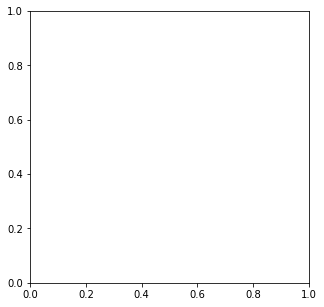

In [71]:
fig = plt.figure(figsize=(5, 5))
cmap=plt.get_cmap('Greys')
fname = os.path.join(m, 'log.json')

with open(fname, 'r') as f:
    log_all = json.load(f)
for ri in range(len(rule_trains)):
    r = rule_trains[ri]
    c = cmap((ri+1)/(len(rule_trains)+1))
    ax = fig.add_subplot(1,1,1)
    x = np.log(log_all['cost_'+r])
    plt.plot(x,'-',c = c)
    ax.set_xlabel('Training Step (x 1000)')
    ax.set_ylabel('Log Cost [for each task]')
    plt.ylim([-6,2])
    
plt.title(m)
plt.show()    

In [72]:
#output dynamics
rule = rule_trains[0]
h,trial,tasks = make_h_trial_rule(m)
w_in, b_in, w_out, b_out = get_model_params(m)

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/1024_n_rnn/lr7.0l2_w6.0_h6.0_sig_rec0.0_sig_x0.0_w_rec_coeff_0.8_delaygo_delayanti/3/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/1024_n_rnn/lr7.0l2_w6.0_h6.0_sig_rec0.0_sig_x0.0_w_rec_coeff_0.8_delaygo_delayanti/3/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(1044, 1024) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(1024,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(1024, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/1024_n_rnn/lr7.0l2

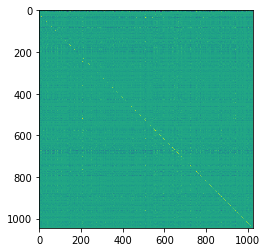

In [73]:
plt.imshow(w_in)

In [74]:
from network import Model
from task import generate_trials, rule_name
import tools

model = Model(m)
with tf.Session() as sess:
    model.restore()
    hparams = model.hp
    trial = generate_trials(rule, hparams, mode='test', batch_size = 20, noise_on=True)
    feed_dict = tools.gen_feed_dict(model, trial, hparams)
    h_tf, y_hat = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(1044, 1024) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(1024,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(1024, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/1024_n_rnn/lr7.0l2_w6.0_h6.0_sig_rec0.0_sig_x0.0_w_rec_coeff_0.8_delaygo_delayanti/3/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/1024_n_rnn/lr7.0l2_w6.0_h6.0_sig_rec0.0_sig_x0.0_w_rec_coeff_0.8_delaygo_delayanti/3/model.ckpt


[]

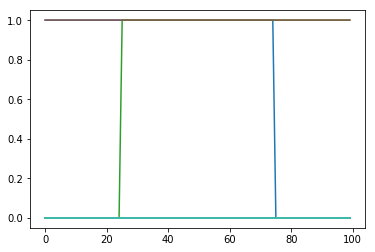

In [75]:
plt.plot(trial.x[:,0,:])
plt.plot()

[]

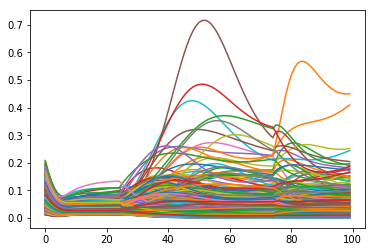

In [76]:
plt.plot(h_tf[:,0,:])
plt.plot()

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softpl

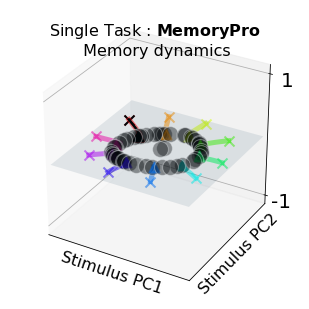

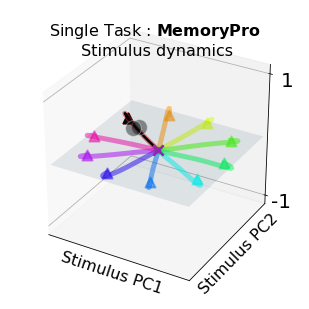

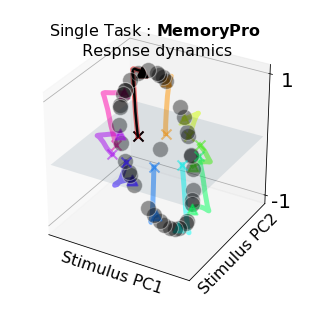

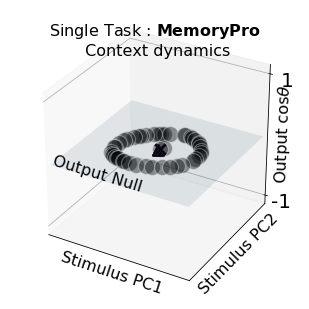

In [8]:
plt.rcParams.update({'font.size': 16})

lim = 1
lil_axes = False
plot_unstable = True
stim_theta = 0 #which fps to plot
rule = rule_trains[0]
fp_file = 'tf_fixed_pts_manytrials'

h,trial,tasks = make_h_trial_rule(m,mode = 'test')
# pca = PCA(n_components = 10)
# x = np.transpose(h[rule],(2,1,0))
# _ = pca.fit_transform(np.reshape(x,(x.shape[0],-1)).T)
# D_use = -pca.components_.T[:,1:]
D_use = make_D_use(m,rule,'stim1',0,'pca_h')
D_use[:,0] = D_use[:,0]
D_use[:,1] = -D_use[:,1]
D_use[:,2] = w_out[:,2]

for epoch in trial[rule].epochs.keys():
    ax = plot_epoch_dynamics_3D(m,fp_file,epoch,h,trial,rule,D_use,y_set = [stim_theta,],lim = lim,
                                plot_eigenspect = False,lil_axes = lil_axes,fig_scale = 4,plot_title = True,
                                plot_unstable = plot_unstable,ax_labels = ['PC1','PC2','Output '+'$\cos{\theta}$'],
                                q_thresh = -6,fp_size = 250)
    
    ax.set_xlim([-.9,.9])
    ax.set_ylim([-.9,.9])
    [x1,x2] = ax.get_xlim()
    [y1,y2] = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x1, x2, num=2), np.linspace(y1, y2, num=2))
    z = xx*0
    ax.plot_surface(xx, yy, z, alpha=0.1)
    
    
    ax.set_zlim([-1.1,1.1])
    ax.set_zticks([-1,1])
    ax.set_zticklabels([-1,1],fontsize = 20)
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('on')
    ax.grid(True)
    
    if epoch == 'fix1':
        ax.set_zlabel('Output '+r'$\cos{\theta}$',labelpad=-10)
        ax.text(x1, y1, 0, 'Output Null', (1,0,0))
        
    ax.set_xlabel('Stimulus PC1', labelpad=-10)
    ax.set_ylabel('Stimulus PC2', labelpad=-10)
    
    
    if lil_axes ==True:
        figname = rule + '_' + epoch +'lil_axes.pdf'
    else:
        figname = rule + '_' + epoch +'.pdf'
        
    if not os.path.exists(figpath):
        os.makedirs(figpath)
    plt.savefig(os.path.join(figpath,figname))

    plt.subplots_adjust(bottom=0.3, right=.9, top=0.9,wspace = 0,hspace = 0)
    
    if lil_axes ==True:
        figname = rule + '_' + epoch +'lil_axes.png'
    else:
        figname = rule + '_' + epoch +'.png'
    plt.savefig(os.path.join(figpath,figname))

    plt.show()

In [7]:

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 16})
from tools_lnd import get_T_inds, make_fp_struct, comp_eig_decomp
from datetime import date

today = date.today()

def plot_fp3D_mov(m,fp_file,epoch,h,trial,rule,D_use,
                        y_set = range(0,360,36),plot_eigenspect = True,lim=4,epoch_axes =[],h_epoch = [],
                        stim_loc_fp = 0,lil_axes = True,plot_unstable = True, ax_labels = [],nr = 1,
                        nc = 1,al = .5,markersize = 100,fp_size = 100,lw = 5,cmap = 'hsv',q_thresh = -10,
                        fig_scale = 6,plot_title=False, lim=lim, LAG = 10, figpath = [], fig_title = []):
    

    if len(figpath)==0:
        figpath = os.path.join(p,'code','overleaf','multitask-nets','v4_figs','paper_figs','dynamics_movs')

    fldr = os.path.join(figpath,'epoch_dynamics_gif/') #set path for where all the movies go
    if not os.path.exists(fldr):
        os.makedirs(fldr)

    if len(fig_title)==0:
        now = datetime.now()
        fig_title = now.strftime("%d_%m_%Y_%H_%M_%S")
        
    movie_dir = os.path.join(fldr,fig_title) #set path for where all the movies go
    if not os.path.exists(movie_dir):
        os.makedirs(movie_dir)

    epoch_name, rule_name, epoch_axes_name, h_epoch = take_names(epoch,rule,epoch_axes = epoch_axes,
                                                                 h_epoch = h_epoch)
    
    fig = plt.figure(figsize=(fig_scale*nc,fig_scale*nr),tight_layout=True,facecolor='white')
    ax = fig.add_axes([0,0,1,1], projection='3d');
    cmap = plt.get_cmap(cmap)
    
    T_inds = get_T_inds(trial[rule],h_epoch)
    if T_inds[0]>0:
        T_inds = range(T_inds[0]-1,T_inds[-1]) #start from the timestep before stim onset etc
        
    movie_inds = T_inds[0:-1:6] #frame every 6 timesteps
    mov_i = 0
    for im_num in movie_inds:
        ax.clear()

        ##plot fps etc
        stim1_locs = np.min(trial[rule].stim_locs[:,[0,2]],axis=1) #only workds for single modality tasks
        y_locs = trial[rule].y_loc[-1,:]
    
        for ind_stim_loc_anti in y_set:
            fps_anti, J_xstar, q_star = make_fp_struct(m,trial[rule],fp_file,rule,epoch,ind_stim_loc_anti)

            #remove pts that aren't that slow
            fps_anti = fps_anti[np.log10(q_star)<q_thresh,:]
            J_xstar = J_xstar[np.log10(q_star)<q_thresh,:,:]

            eig_decomps = comp_eig_decomp(J_xstar)
            fps_tdr_anti = np.dot(fps_anti,D_use)
            fp_c = cmap(ind_stim_loc_anti/(360))

            for s in range(len(eig_decomps)):

                X_trial = np.dot(fps_anti[s,:],D_use)

                stability_metric = 1.4 - np.max(eig_decomps[s]['evals'].real)

                ax.scatter(X_trial[0], X_trial[1],X_trial[2],s = fp_size,marker = 'o',
                               edgecolors = 'w',facecolors = 'k',alpha = stability_metric)


        ##plot trajectory
        plot_set_start = np.max([T_inds[0],im_num-LAG])
        plot_set = range(plot_set_start,im_num)

        plt.plot(h_D[plot_set,0],h_D[plot_set,1],c = c,alpha = 1,linewidth = 3)
        plt.plot(h_tD[0,0],h_D[0,1],'x',c = c,alpha = 1,markersize = 10,linewidth = 2) # keep starting pt in every frame

        ### ax labels
        ###set x,y lims

        mov_i += 1 
        plt.savefig(movie_dir +'/'+ str(mov_i) + '.png')
        
    
    for t in range(0,np.shape(h[rule])[1],int(np.shape(h[rule])[1]/10)):
        h_D = np.dot(h[rule][T_inds,t,:],D_use)

        ax.plot3D(h_D[plot_set,0],h_D[plot_set,1],h_D[plot_set,2],
                  c = cmap(stim1_locs[t]/(2*np.pi)),
                  alpha = al,linewidth = lw)

        ax.scatter(h_D[0,0],h_D[0,1],h_D[0,2],
                   s = markersize,
                   marker = 'x',
                   c = cmap(stim1_locs[t]/(2*np.pi)),
                   alpha = al,
                   linewidth = 2)

        ax.scatter(h_D[plot_set[-1],0],h_D[plot_set[-1],1],h_D[plot_set[-1],2],
                   s = markersize,
                   marker = '^',
                   c = cmap(stim1_locs[t]/(2*np.pi)),
                   alpha = al,
                   linewidth = 2)
        
        
        if stim1_locs[t]==stim_loc_fp or epoch=='fix1':
        
            ax.plot3D(h_D[plot_set,0],h_D[plot_set,1],h_D[plot_set,2],
                      c = 'k',
                      alpha = 1,
                      linewidth = lw/2)
            
            ax.scatter(h_D[0,0],h_D[0,1],h_D[0,2],
                       s = markersize,
                       marker = 'x',
                       c = 'k',
                       alpha = 1,
                       linewidth = 2)
            
            ax.scatter(h_D[plot_set[-1],0],h_D[plot_set[-1],1],h_D[plot_set[-1],2],
                       s = markersize,
                       marker = '^',
                       c = 'k',
                       alpha = 1,
                       linewidth = 2)
        
    lim = lim
    ax.set_zlim([-1.2,1.2])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.axis('off')
    
    if plot_title:
        plt.title('Single Task : '+r"$\bf{" + rule_name + "}$"+ '\n '+epoch_name+' dynamics',y = .9,fontsize = 16)
        
    images = []
    for t in range(0,mov_i):#T*xt):
        filename = movie_dir +'/'+ str(t) + '.png'
        images.append(imageio.imread(filename))

    imageio.mimsave(movie_dir+'/movie.gif', images)
      
    return ax

SyntaxError: duplicate argument 'lim' in function definition (<ipython-input-7-b9a1b845c723>, line 9)